In [4]:
import pandas as pd
pd.set_option('max_colwidth', 35)
import re
import certifi
import urllib3
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [32]:
df = pd.read_csv("Openrice_Transformed_V2.csv")

### Highlight the most important sentence

In [165]:
from nltk.probability import FreqDist
from heapq import nlargest
from collections import defaultdict

def summarize_reviews(s):

    # tokenize the reviews into sentence and words
    sent_to = sent_tokenize(str(s.lower()))
    word_to = word_tokenize(str(s.lower()))
    
    # remove stopwords from the text strings
    _stopwords = set(stopwords.words("english") + list(punctuation))
    word_clean = [w for w in word_to if w not in _stopwords]
    freq = FreqDist(word_clean)
    # nlargest(10, freq, key = freq.get)

    # identify important sentence by frequent words it contains
    ranking = defaultdict(int)

    for i, sen in enumerate(sent_to):
        for w in word_tokenize(sen.lower()):
            if w in freq:
                ranking[i] += freq[w]
    
    # Find only the most important sentence
    sents_index = nlargest(1, ranking, key = ranking.get)
    return [sent_to[j] for j in sorted(sents_index)]

In [1]:
# https://stackoverflow.com/questions/38119954/tokenizing-words-into-a-new-column-in-a-pandas-dataframe
addwords = lambda x: summarize_reviews(x)

In [167]:
df["summary"] = df["Reviews"].apply(addwords)

In [168]:
df["summary"][7]

['i fount it interesting they served it on a thin piece of lettuce like how it was served in the old days before steaming it in paper like it is now.0stir fried shanghai noodles.']

### Word Cloud: Secrets of Success

In [7]:
# Sort out the 10 top rated restaurants
df_sorted = df.sort_values("Rating_Average", 
                    ascending = False)

top10 = df_sorted.head(10)

In [19]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [11]:
top10[["Restaurant_Name","Reviews","Rating_Average"]].head()

,Restaurant_Name,Reviews,Rating_Average
758,Tiger Sugar,Taiwanese bubble tea is one of ...,4.8
648,Soupday,"Its not just soup of the day, i...",4.8
711,Tasty Congee & Noodle Wantun Shop,Hanging out at the ifc mall for...,4.8
747,The Noodle Hive,Best Noodles I've had in HK. I...,4.8
370,Kyoku,lunchSushi Bar. There are a goo...,4.8


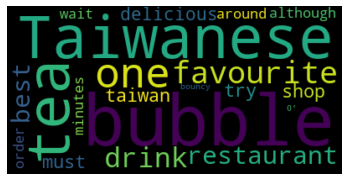

In [20]:
# Take Tiger Sugar as an example
text = top10.iloc[0]["Reviews"]

# create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Diplay the generated image:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


In [21]:
wordcloud.to_file("img/Tiger_Sugar.png")